# 6.5 ESA Task 6.5 Extension - SRS Norway

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Verify Norway dataset import results; data wrangling

#### 03. Data preprocessing

#### 04. PCA (Principal Components Analysis)

#### 05. k-means clustering

#### 06. Visualizations

#### 07. Task 6.5 Extension: Norway SRS component data derivation

### 01. Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1" # This only applies to this notebook session, to try to mitigate annoying Windows-constraint related warnings
import sklearn
from sklearn.cluster import KMeans # Imports the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Imports z-score method scaling function to standardize (normalize) numerical data.
from sklearn.decomposition import PCA # Imports the PCA algorithm for PCA analysis.

In [3]:
# This option ensures the plots created in the notebook are displayed without the need to "call" them specifically.
%matplotlib inline

In [5]:
# Import datasets

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

norway_cat_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_cat_pre_stat.pkl'))
norway_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
exo_shk_flags = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'exo_shk_flags_copy.pkl'))

In [7]:
fx_vix_comm_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

### 02. Verify Norway dataset import results; data wrangling

#### Norway country-level dataset chosen for PCA + k-means clustering analysis

#### Verify the "norway_cat_pre_stat" dataframe is as expected.

In [12]:
norway_cat_pre_stat.shape

(231, 14)

In [14]:
norway_cat_pre_stat.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,shock_name
0,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,-0.110001,0.059023,0.359997,0.414646,No Shock
1,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.062883,0.056374,0.285218,0.414646,No Shock
2,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,-0.116166,0.065444,0.164536,0.414646,No Shock


In [16]:
norway_cat_pre_stat.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,shock_name
228,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.224487,0.087412,-0.011698,0.437476,Rus_Ukr_War & BOJ Pivot
229,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.193819,0.059788,-0.084259,0.637948,Rus_Ukr_War & BOJ Pivot
230,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.459799,0.007512,-0.169132,0.433658,Rus_Ukr_War & BOJ Pivot


In [18]:
norway_cat_pre_stat.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12',
       'brent_avg_logret12', 'nat_gas_eu_avg_logret12', 'shock_name'],
      dtype='object')

#### Verify the "norway_pre_stat" dataframe content is as expected.

In [21]:
norway_pre_stat.shape

(243, 31)

In [23]:
norway_pre_stat.head(15)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3402,Norway,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3403,Norway,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3404,Norway,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3405,Norway,2005-04-01,2005,4,2005-04,Apr,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3406,Norway,2005-05-01,2005,5,2005-05,May,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3407,Norway,2005-06-01,2005,6,2005-06,Jun,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3408,Norway,2005-07-01,2005,7,2005-07,Jul,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3409,Norway,2005-08-01,2005,8,2005-08,Aug,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3410,Norway,2005-09-01,2005,9,2005-09,Sep,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3411,Norway,2005-10-01,2005,10,2005-10,Oct,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN


In [25]:
norway_pre_stat.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3642,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.087412,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322
3643,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.059788,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322
3644,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.007512,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322


In [27]:
norway_pre_stat.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

#### Reshape and reset the index for the "norway_pre_stat" dataframe to match the temporal period range and indexing of the other dataframes, which run from Jan 2006 to Mar 2025, on a monthly temporal grain.

In [30]:
# Reset the index (the argument "drop=True" drops the original index)
norway_pre_stat.reset_index(drop=True, inplace=True)

In [32]:
# Delete first 12 rows and overwrite the dataframe
norway_pre_stat.drop(index=range(12), inplace=True)

In [34]:
norway_pre_stat.shape

(231, 31)

In [36]:
norway_pre_stat.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
12,Norway,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,...,0.059023,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085
13,Norway,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,...,0.056374,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085
14,Norway,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,...,0.065444,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085


In [38]:
# Reset the index (the argument "drop=True" drops the original index)
norway_pre_stat.reset_index(drop=True, inplace=True)

In [40]:
norway_pre_stat.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
0,Norway,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,...,0.059023,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085
1,Norway,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,...,0.056374,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085
2,Norway,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,...,0.065444,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085


In [42]:
norway_pre_stat.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
228,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.087412,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322
229,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.059788,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322
230,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.007512,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322


#### Verify the "exo_shk_flags" dataframe content is as expected.

In [45]:
exo_shk_flags.shape

(231, 7)

In [47]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [49]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [51]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

#### Verify the "fx_vix_comm_pre_stat" dataframe content is as expected.

In [53]:
fx_vix_comm_pre_stat.shape

(243, 74)

In [55]:
fx_vix_comm_pre_stat.head(15)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,2005,4,2005-04,Apr,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,2005,5,2005-05,May,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,2005,6,2005-06,Jun,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,2005,7,2005-07,Jul,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,2005,8,2005-08,Aug,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,2005,9,2005-09,Sep,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,2005,10,2005-10,Oct,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [59]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Reshape the "fx_vix_comm_pre_stat" dataframe to have the same temporal range and index number sequence as the other dataframes, which means deleting the year 2005 monthly data rows (which have NaN values for all the annual log return variables based on the 12-period lag in the log return calculation).

In [62]:
# Delete first 12 rows and overwrite the dataframe
fx_vix_comm_pre_stat.drop(index=range(12), inplace=True)

In [64]:
fx_vix_comm_pre_stat.shape

(231, 74)

In [66]:
fx_vix_comm_pre_stat.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,False,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,False,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,False,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [68]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [70]:
# Reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_pre_stat.reset_index(drop=True, inplace=True)

In [72]:
fx_vix_comm_pre_stat.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,False,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,False,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,False,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [74]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [76]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Create a "df" subset dataframe of just the annual log return numerical variables of interest, that will be standardized and then undergo PCA. Omit categorical variables and the timestamp variable.

In [79]:
df = norway_cat_pre_stat[['int_rate_10y_diff', 'stock_index_logret12', 'vix_avg_logret12', 'cons_prices_logret12', \
                          'brent_avg_logret12', 'fx_to_usd_logret12', 'unemp_rate_logret12']]

In [81]:
df.shape

(231, 7)

In [83]:
df.head(3)

,int_rate_10y_diff,stock_index_logret12,vix_avg_logret12,cons_prices_logret12,brent_avg_logret12,fx_to_usd_logret12,unemp_rate_logret12
0,-0.0025,0.444747,-0.110001,0.018304,0.359997,0.059023,-0.068993
1,-0.0005,0.426241,0.062883,0.025502,0.285218,0.056374,-0.046520
2,-0.0018,0.441201,-0.116166,0.022990,0.164536,0.065444,-0.165080


In [85]:
df.tail(3)

,int_rate_10y_diff,stock_index_logret12,vix_avg_logret12,cons_prices_logret12,brent_avg_logret12,fx_to_usd_logret12,unemp_rate_logret12
228,0.0038,0.128220,0.224487,0.023213,-0.011698,0.087412,-0.195745
229,0.0018,0.158825,0.193819,0.034909,-0.084259,0.059788,0.082238
230,0.0041,0.140900,0.459799,0.026053,-0.169132,0.007512,-0.051293


In [87]:
df.columns

Index(['int_rate_10y_diff', 'stock_index_logret12', 'vix_avg_logret12',
       'cons_prices_logret12', 'brent_avg_logret12', 'fx_to_usd_logret12',
       'unemp_rate_logret12'],
      dtype='object')

In [89]:
df.dtypes

int_rate_10y_diff       float64
stock_index_logret12    float64
vix_avg_logret12        float64
cons_prices_logret12    float64
brent_avg_logret12      float64
fx_to_usd_logret12      float64
unemp_rate_logret12     float64
dtype: object

#### Create "df1" subset dataframe with seven (7) original raw data variables (pre-log return transformations), to see whether these can obtain better PCA results than the "df" subset dataframe's annual log return or first difference % versions of these variables.

In [92]:
df1 = norway_pre_stat[['int_rate_10y', 'stock_index', 'cons_prices', 'fx_to_usd', 'unemp_rate']].copy()

In [94]:
df1[['vix_avg', 'brent_avg']] = fx_vix_comm_pre_stat[['vix_avg', 'brent_avg']]

In [96]:
df1.shape

(231, 7)

In [98]:
df1.head(3)

,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg
0,3.65,59.19,82.7,6.63,4.2,12.04,63.31
1,3.72,62.01,83.4,6.75,4.2,12.47,60.81
2,3.84,65.09,83.6,6.63,3.9,11.69,62.75


In [100]:
df1.tail(3)

,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg
228,3.88,257.77,135.1,11.35,3.7,16.76,78.19
229,3.88,258.42,137.0,11.20,3.8,16.97,75.19
230,4.02,261.14,136.1,10.69,3.8,21.84,71.74


In [102]:
df1.columns

Index(['int_rate_10y', 'stock_index', 'cons_prices', 'fx_to_usd', 'unemp_rate',
       'vix_avg', 'brent_avg'],
      dtype='object')

In [104]:
df1.dtypes

int_rate_10y    float64
stock_index     float64
cons_prices     float64
fx_to_usd       float64
unemp_rate      float64
vix_avg         float64
brent_avg       float64
dtype: object

#### Create subset dataframe with timestamp & shock name variables for later reinsertion and use in plot analyses after PCA & clustering, on the exact same indexing sequence as the "df" and "df1" dataframes.

In [107]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

In [109]:
timestamp_shock = exo_shk_flags[['timestamp', 'shock_name']]

In [111]:
timestamp_shock.shape

(231, 2)

In [113]:
timestamp_shock.head(3)

,timestamp,shock_name
0,2006-01-01,No Shock
1,2006-02-01,No Shock
2,2006-03-01,No Shock


In [115]:
timestamp_shock.tail(3)

,timestamp,shock_name
228,2025-01-01,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,Rus_Ukr_War & BOJ Pivot


In [117]:
timestamp_shock.columns

Index(['timestamp', 'shock_name'], dtype='object')

In [119]:
timestamp_shock.dtypes

timestamp     datetime64[ns]
shock_name            object
dtype: object

### Note: Data consistency, accuracy and other checks were conducted on the imported dataframes in prior Tasks, thus will not be repeated here.

### 03. Data preprocessing

#### Comment: The clustering goal for this Task 6.5 is to segment behavioral patterns in the data, rather than set the stage for forecasting variable(s).  Accordingly, stationarization of non-stationary data here is not needed as time series forecasting is not the goal for a next step.  K-means clustering does not require stationarity, with a few exceptions (i.e., secular trends that dominate variance). After standardization of numerical data, PCA will be conducted on the "df" (annual log return or first difference % transformed data) and "df1" (original raw data) dataframes to see which dataset yields higher explained variance ratios and provides a clearer clustering structure in 2D or 3D scatterplots.  The "winner" dataset will then undergo k-means clustering to find and segment any behavioral patterns in the data, which temporally span a 19+ year period subjected to five (5) major or moderate exogenous economic shocks (some standalones, some overlapping). PCA is conducted for dimensionality reduction.

#### Dataset dimensions of 231 x 7 are on the small side for PCA of seven (7) variables and subsequent clustering, but with luck sufficient to yield meaningful, clear patterns in the data.  For PCA on time series data, which is the case here, there is a choice between using time points or variables as observations, depending on the analysis goal.  Here we choose time points as observations (as the datasets are structured), because the analytical goal is to identify co-movements among variables over time. Best for macro behavioral analysis. We are not trying to cluster entire time series as shapes, longitudinally, not trying to cluster variables.

#### Standardization of different-scales data is necessary before PCA & clustering work, so the imported StandardScaler function will be applied. It uses the z-score method for scaling, which is appropriate for the use case here. For other types of tasks, specifically DL (deep learning) algorithm uses, the "minmax" rather than z-score method (and therefore, a different function selection) would be the right tool for rescaling.

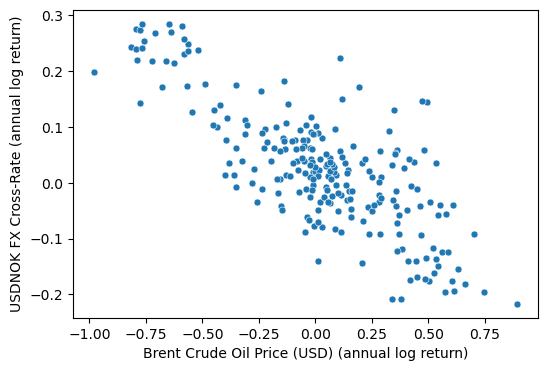

In [134]:
# Helpful to scatterplot some variables before rescaling, to visualize the data
# Select Brent crude oil price vs USDNOK based on an earlier Task showing a -0.78 correlation coefficient for that pair's annual log returns
# That was the strongest correlation that surfaced for Norway in its preliminary correlation matrix heatmap

plt.figure(figsize=(6, 4))
ax = sns.scatterplot(x=df['brent_avg_logret12'], y=df['fx_to_usd_logret12'], s=25) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Brent Crude Oil Price (USD) (annual log return)') # Label x-axis.
plt.ylabel('USDNOK FX Cross-Rate (annual log return)') # Label y-axis.
plt.show()

#### Negative correlation, as expected for crude oil exporter Norway.

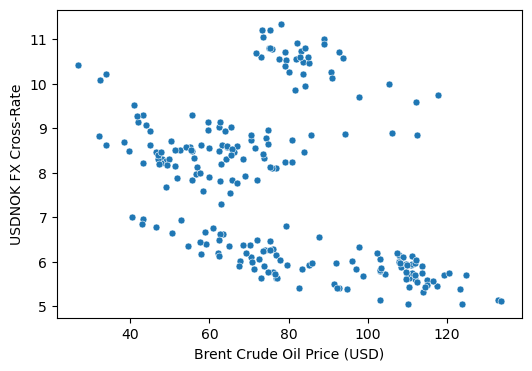

In [137]:
# For comparison, a scatterplot of the same non-transformed variables in their original raw data form

plt.figure(figsize=(6, 4))
ax = sns.scatterplot(x=df1['brent_avg'], y=df1['fx_to_usd'], s=25) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Brent Crude Oil Price (USD)') # Label x-axis.
plt.ylabel('USDNOK FX Cross-Rate') # Label y-axis.
plt.show()

#### An effective illustration (above) of what can happen when you scatterplot different-scale variables against each other.

In [140]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [142]:
scaler = StandardScaler()
df1_std = scaler.fit_transform(df1)

In [144]:
# Check the dimensions
df_std.shape

(231, 7)

In [146]:
# Output using StandardScaler() is an array. Check the first 3 rows of the multi-dimensional array.
# Note that NumPy arrays are optimized for numerical computations, so arrays are preferred over dataframes in various ML applications.

df_std[0:3]

array([[-0.34432463,  1.75562556, -0.28797603, -0.49957488,  0.94188209,
         0.28939906, -0.30798615],
       [-0.06272084,  1.66478157,  0.11519526, -0.00368496,  0.73547214,
         0.26524634, -0.19634932],
       [-0.24576331,  1.73822208, -0.3023531 , -0.17679837,  0.402358  ,
         0.34794118, -0.78531023]])

In [148]:
# Repeat verification steps for the "df1_std" standardized array.
df1_std.shape

(231, 7)

In [150]:
df1_std[0:3]

array([[ 0.79186778, -1.04578124, -1.43351411, -0.57898765,  0.51723897,
        -0.88603278, -0.6022768 ],
       [ 0.85084752, -0.99743333, -1.38575787, -0.5107266 ,  0.51723897,
        -0.83466908, -0.7084205 ],
       [ 0.95195565, -0.94462782, -1.37211324, -0.57898765,  0.07196368,
        -0.92784044, -0.62605299]])

### 04. PCA (Principal Components Analysis)

### PCA of the standardized annual log return (or first difference %'s) Norway 7-variable dataset

In [154]:
# Create a PCA instance (e.g. instantiate) and fit same to the "df_std" standardized data array for the mostly-annual log return dataset
pca = PCA()
pca.fit(df_std)

PCA()

In [156]:
# PCA creates as many components as there are numerical features in the fitted array
# Apply the .explained_variance_ratio_ attribute to reveal how much data variance is explained by each of the seven individual components

pca.explained_variance_ratio_

array([0.44691965, 0.20630966, 0.14469133, 0.09676957, 0.05141607,
       0.03851798, 0.01537574])

Text(0, 0.5, 'Cumulative Explained Variance')

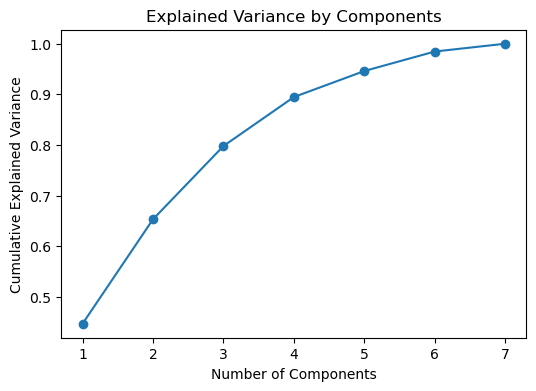

In [158]:
# Plot cumulative variance explained by total number of components, using the .cumsum() method
# We can use the "Elbow" technique to try to optimize for the subset of components we want to retain for k-means clustering work
# A rule-of-thumb is to select sufficient principal components to reach ~ 80% cumulative sum of explained variance

plt.figure(figsize = (6, 4))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### 3 components would be a sensible choice, based on the "Elbow" technique and aiming for ~ 80% cumulative variance explained.

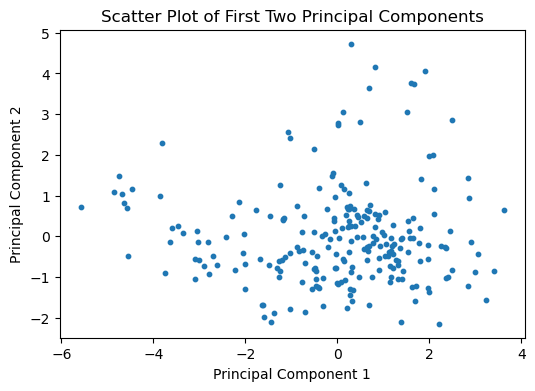

In [161]:
# Scatterplotting in 2D the first two (2) principal components against each other to look for any clear clusters
# Because pca.fit() outputs a fitted object but does not directly output a transformed dataset, we need to transform the object
# The fit_transform() function will fit the PCA model to the data and transform it to the new principal component space (coordinates system)
# We create a PCA object with n_components=2, to select the first two principal components

pca_2 = PCA(n_components=2)
pca_results_2 = pca_2.fit_transform(df_std)

plt.figure(figsize=(6, 4))
plt.scatter(pca_results_2[:,0], pca_results_2[:,1], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(False)
plt.show()

In [163]:
pca_results_2.shape

(231, 2)

In [165]:
pca_results_2[0:3]

array([[ 1.20436796, -0.77577767],
       [ 1.05321107, -0.19871211],
       [ 1.12114118, -0.37923118]])

### For comparison: PCA of the standardized raw data from the Norway 7-variable dataset

In [168]:
# Create a PCA instance (e.g. instantiate) and fit same to the "df1_std" standardized data array for the original raw data
pca1 = PCA()
pca1.fit(df1_std)

PCA()

In [170]:
# PCA creates as many components as there are numerical features in the fitted array
# Apply the .explained_variance_ratio_ attribute to reveal how much data variance is explained by each of the seven individual components

pca1.explained_variance_ratio_

array([0.47325015, 0.23941774, 0.15575008, 0.08646095, 0.03848169,
       0.00471254, 0.00192686])

#### Surprise finding: these relative variances have improved versus the other standardized dataset.

Text(0, 0.5, 'Cumulative Explained Variance')

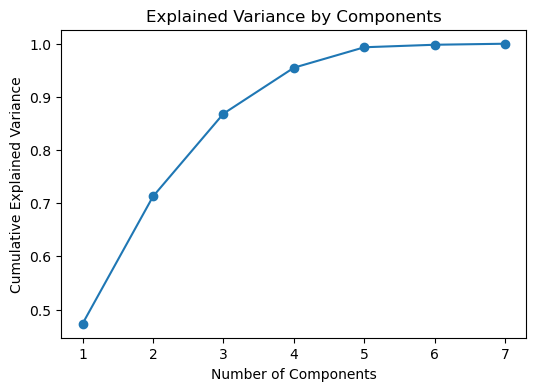

In [173]:
# Plot cumulative variance explained by total number of components, using the .cumsum() method
# We can use the "Elbow" technique to try to optimize for the subset of components we want to retain for k-means clustering work
# A rule-of-thumb is to select sufficient principal components to reach ~ 80% cumulative sum of explained variance

plt.figure(figsize = (6, 4))
plt.plot(range(1,8), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### As before, 3 components would be a sensible choice, based on the "Elbow" technique and aiming for ~ 80% cumulative variance explained.  However, for this PCA fitted to the standardized version of the original raw data, the first 3 components cumulatively explain ~ 87% of the data variance, compared to ~ 80% in the prior case.

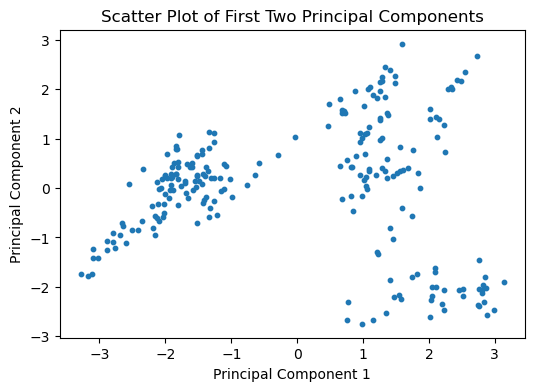

In [176]:
# Scatterplotting in 2D the first two (2) principal components against each other to look for any clear clusters
# Because pca1.fit() here outputs a fitted object but does not directly output a transformed dataset, we need to transform the object
# The fit_transform() function will fit the PCA model to the data and transform it to the new principal component space (coordinates system)
# We create a PCA object with n_components=2, to select the first two principal components

pca1_2 = PCA(n_components=2)
pca1_results_2 = pca1_2.fit_transform(df1_std)

plt.figure(figsize=(6, 4))
plt.scatter(pca1_results_2[:,0], pca1_results_2[:,1], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(False)
plt.show()

#### Surprise finding: also, better visual separability of cluster patterns vis-a-vis the other standardized dataset.

#### Takeaways: surmising that the different results may have stemmed from the apparent "handicap" here (for PCA) in the case of the annual log returns (standardized) dataset, not the raw dataset, which oscillates monthly rather than annually on a rolling month-by-month basis (for the log returns), it made sense to query ChatGPT on the topic.  ChatGPT very helpfully explained the following: (i) the 12-month trailing log returns smooth out the signal over time, both muting high-frequency variation ("where PCA and clustering often find structure") and introducing autocorrelation between months which PCA does not account for; (ii) PCA finds directions of maximum variance but the rolling 12-month log returns probably compressed variance (i.e. in trending series such as stocks, oil or inflation); the standardized raw data may have kept more of the "natural contrast" between variables, particularly for sharp regime shifts or volatility changes; and (iii) "Trailing 12-month returns represent a kind of long-memory behavior. If macro shifts happen abruptly (Covid-19, GFC, Russia-Ukraine War, etc.), the log-return transformations could lag those behaviors, blurring transitions." 

#### Based on the PCA results comparison revealing the raw dataset (standardized) as the clear winner, the PCA-based transformation and principal component selection from that source will be used in the k-means clustering next step here.

### 05. k-means clustering

In [182]:
# From PCA we decided to keep only 3 components (of 7) for the originally-sourced raw data (standardized) in the "df1_std" array
# We need to instantiate an object again by applying the PCA() function to 3 components

pca1 = PCA(n_components = 3)

In [184]:
# Fit the pca1 model to the standardized data in the "df1_std" array, with the selected three (3) components
pca1.fit(df1_std)

PCA(n_components=3)

In [186]:
# Obtain the component loadings matrix
# The matrix shows how much each original variable contributes to each of the three (3) principal components (PCs)
# The loadings help us later interpret what each PC represents conceptually in terms of behaviors (i.e. "risk-on vs defensive", etc.)

loadings_df = pd.DataFrame(pca1.components_.T,
                           columns=[f'PC{i+1}' for i in range(pca1.n_components_)],
                           index=df1.columns)

In [188]:
loadings_df.shape

(7, 3)

#### Loadings of the principal components

In [191]:
# Check the loadings of the principal components
loadings_df

,PC1,PC2,PC3
int_rate_10y,-0.317967,-0.467066,0.168493
stock_index,0.463057,-0.402069,-0.022713
cons_prices,0.494460,-0.315613,0.037535
fx_to_usd,0.517895,-0.165013,0.180415
unemp_rate,0.321243,0.527298,-0.155814
vix_avg,-0.098933,0.025626,0.881489
brent_avg,-0.242456,-0.463304,-0.368558


## Findings from the PC loadings

#### The loadings (in the table above) represent the correlation between original variables and the principal components.  The higher the absolute value of the number, the stronger the contribution of the original variable to the principal component. The sign (positive or negative) of the contribution can mislead as it can flip-flop from PCA() run to run, making interpretation difficult. Primarily, the loadings help us figure out which original variables are most important to a PC. That in turn helps us interpret the meaning of a PC and the patterns it may reveal in the data.

#### PC1, which explains ~47% of total variance (see the earlier array output from running the attribute ".explained_variance_ratio_" on the PCA object "pca1"), a relatively high proportion explained by a single principal component, is primarily driven by the USDNOK FX rate ('fx_to_usd' variable) ~0.52 loading, inflation ('cons_prices' variable) ~0.49 loading and Norwegian stock market index ('stock_index' variable) ~0.46 loading.  Normally we expect NOK to strengthen (relative to USD) when the stock market climbs, while its co-movement with the inflation rate is less clear.  Later visualizations will shed light on this "Inflation - Currency - Equities" axis relationship with k-means-determined market behavioral clusters and the exogenous shocks examined in this project.

#### PC2, which explains ~24% of total variance, is driven primarily by the unemployment rate, 10-year interest rate and Brent crude oil price (in USD). The stock market index has a smaller contribution to PC2. PC2 might be thought of as a "Labor - Cost of Money - Commodities" axis.

#### PC3, which explains ~16% of total variance, is remarkable in that only one (1) component -- the VIX -- has an overwhelmingly high 0.88 loading and is a foreign (US equities market-based) risk sentiment measure.  In earlier correlation matrix heatmaps, it became clear that the VIX's impact on a stock market is not confined to the US, but rather it has a seat at the table in many non-US stock markets. PC3 can be thought of as a single "Risk Sentiment" axis.

#### Create PCA scores

In [199]:
# Use the transform() function to create PCA scores which will be incorporated in the k-means algorithm
# That will permit clustering segmentation based on principal components scores rather than original features

pca1.transform(df1_std)

array([[-1.34487112e+00,  1.12766818e+00, -6.40736624e-01],
       [-1.26161769e+00,  1.10483817e+00, -5.33392611e-01],
       [-1.45171461e+00,  7.67998728e-01, -5.72465577e-01],
       [-1.59829116e+00,  4.99526758e-01, -6.66640567e-01],
       [-1.80377158e+00,  4.25118905e-01, -3.87331717e-01],
       [-1.81084723e+00,  5.30445458e-01, -1.04400508e-01],
       [-2.06764254e+00,  3.39465991e-03, -2.21025963e-01],
       [-1.91283045e+00,  2.05265242e-01, -4.84149489e-01],
       [-1.80522679e+00,  1.74989759e-01, -3.48359671e-01],
       [-1.94438570e+00, -1.99268456e-01, -2.40915336e-01],
       [-1.88836369e+00, -4.85696022e-02, -3.77418038e-01],
       [-1.99992417e+00, -1.26883742e-01, -4.22357370e-01],
       [-1.92331093e+00, -4.61304159e-02, -2.57379480e-01],
       [-2.11187338e+00, -3.30090836e-01, -2.53101476e-01],
       [-2.20113935e+00, -3.65742547e-01,  8.76308139e-02],
       [-2.35631135e+00, -6.70954649e-01, -1.85304276e-01],
       [-2.41978589e+00, -8.41459640e-01

#### Save the PCA scores

In [202]:
# Save the principal components scores array output for use in the k-means algorithm
scores_pca1 = pca1.transform(df1_std)

#### The next step is to determine the number of clusters for the k-means algorithm, starting with a "plug" number of 20, then having the algorithm test varying cluster numbers and determining the WCSS ("Within Cluster Sum of Squares") of each, which when plotted against cluster number allows us to visually use the "Elbow" technique (again) to optimize for the number of clusters to adopt. The "Elbow" technique is equally relevant to PCA-based principal component selection as to k-means-based cluster number selection.  WCSS quantifies the compactness of a cluster, calculated by summing the squared distances between each data point and the centroid of its respective cluster. The smaller the WCSS, the better for a clustering goal.

#### k-means clustering with PCA

In [206]:
# Fit k-means algorithm with the transformed data from the PCA
# The "random_state= [any integer value]" argument ensures reproducibility of results
# This "seeding" of the random number generator is needed because k-means is a non-deterministic algorithm

wcss = []

for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 8)  # Create a KMeans instance with i clusters: kmeans_pca
    kmeans_pca.fit(scores_pca1)  # Fit the model to the PCA scores
    wcss.append(kmeans_pca.inertia_)  # Append the inertia value (e.g., the WCSS calculated value) to the list of inertias

In [208]:
wcss[0:3]

[1404.2318445107653, 964.8663287578754, 437.57390418304794]

#### The "wcss" list was created. Meanwhile, we avoided a Windows constraint-related warning message this time by setting the OMP_NUM_THREADS temporarily to 1 at the start of this notebook session (expires when the notebook is closed).

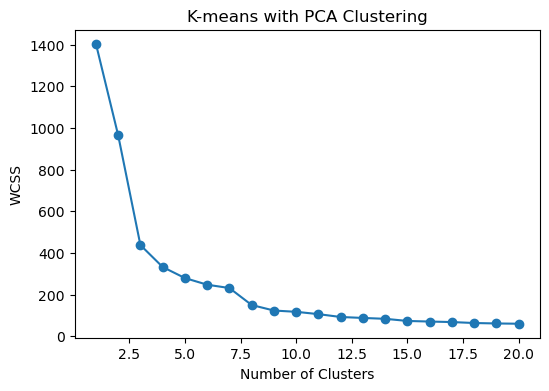

In [213]:
# Plot the WCSS against the number of components in a line plot

plt.figure(figsize = (6, 4))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '-')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Decision: a kinky line makes things interesting, er, thickens the plot. However, the "Elbow" technique argues for selection of 3 clusters. That inflection point is where the rate of WCSS decline decelerates sharply once we move on to 4 clusters and beyond.

In [216]:
# We will run the k-means clustering algorithm on 3 clusters, based on the WCSS line plot against number of clusters
# Apply same initializer and random state integer used prior (above)

kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 8)

In [218]:
# Fit the scores_pca1 with the kmeans_pca model

kmeans_pca.fit(scores_pca1)

KMeans(n_clusters=3, random_state=8)

### Results: k-means clustering with PCA

#### Create a new dataframe that takes the original source dataframe, adds the components' scores from the scores_pca1 array (to be labeled Component 1, 2 and 3), and the cluster labels. Also add a 'Segment' new column to name each of the three clusters (initially as "first", "second" and "third", which can be swapped later for more descriptive names). Finally, add columns for 'timestamp' and the categorical variable 'shock_name', in order to compare behavioral patterns in the data with exogenous shock periods, a key goal of this Task 6.5.

In [222]:
df1_pca_kmeans_time_shk = pd.concat([timestamp_shock, df1, pd.DataFrame(scores_pca1)], axis = 1) # Concatenates 3 longitudinally-equal datasets
df1_pca_kmeans_time_shk.columns.values[-3: ] = ['component 1', 'component 2', 'component 3'] # Renames the principal component columns
df1_pca_kmeans_time_shk['segment k-means pca'] = kmeans_pca.labels_   # Adds a column with the clustering labels

In [224]:
df1_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg,component 1,component 2,component 3,segment k-means pca
0,2006-01-01,No Shock,3.65,59.19,82.7,6.63,4.2,12.04,63.31,-1.344871,1.127668,-0.640737,1
1,2006-02-01,No Shock,3.72,62.01,83.4,6.75,4.2,12.47,60.81,-1.261618,1.104838,-0.533393,1
2,2006-03-01,No Shock,3.84,65.09,83.6,6.63,3.9,11.69,62.75,-1.451715,0.767999,-0.572466,1


In [226]:
df1_pca_kmeans_time_shk.tail(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg,component 1,component 2,component 3,segment k-means pca
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,3.88,257.77,135.1,11.35,3.7,16.76,78.19,2.880824,-2.572626,0.312955,0
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,3.88,258.42,137.0,11.20,3.8,16.97,75.19,2.981970,-2.466019,0.348103,0
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,4.02,261.14,136.1,10.69,3.8,21.84,71.74,2.763413,-2.389842,0.879043,0


In [228]:
# Add a 'segment' column to give a preliminary name to each of the 3 clusters
df1_pca_kmeans_time_shk['segment'] = df1_pca_kmeans_time_shk['segment k-means pca'].map({0: 'first', 1: 'second', 2: 'third'})

In [230]:
df1_pca_kmeans_time_shk.shape

(231, 14)

In [232]:
df1_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,3.65,59.19,82.7,6.63,4.2,12.04,63.31,-1.344871,1.127668,-0.640737,1,second
1,2006-02-01,No Shock,3.72,62.01,83.4,6.75,4.2,12.47,60.81,-1.261618,1.104838,-0.533393,1,second
2,2006-03-01,No Shock,3.84,65.09,83.6,6.63,3.9,11.69,62.75,-1.451715,0.767999,-0.572466,1,second


In [234]:
df1_pca_kmeans_time_shk.tail(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg,component 1,component 2,component 3,segment k-means pca,segment
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,3.88,257.77,135.1,11.35,3.7,16.76,78.19,2.880824,-2.572626,0.312955,0,first
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,3.88,258.42,137.0,11.20,3.8,16.97,75.19,2.981970,-2.466019,0.348103,0,first
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,4.02,261.14,136.1,10.69,3.8,21.84,71.74,2.763413,-2.389842,0.879043,0,first


In [236]:
df1_pca_kmeans_time_shk['segment'].value_counts()

segment
second    106
third      83
first      42
Name: count, dtype: int64

In [238]:
df1_pca_kmeans_time_shk.columns

Index(['timestamp', 'shock_name', 'int_rate_10y', 'stock_index', 'cons_prices',
       'fx_to_usd', 'unemp_rate', 'vix_avg', 'brent_avg', 'component 1',
       'component 2', 'component 3', 'segment k-means pca', 'segment'],
      dtype='object')

In [240]:
df1_pca_kmeans_time_shk['shock_name'].value_counts()

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

In [242]:
df1_pca_kmeans_time_shk.dtypes

timestamp              datetime64[ns]
shock_name                     object
int_rate_10y                  float64
stock_index                   float64
cons_prices                   float64
fx_to_usd                     float64
unemp_rate                    float64
vix_avg                       float64
brent_avg                     float64
component 1                   float64
component 2                   float64
component 3                   float64
segment k-means pca             int32
segment                        object
dtype: object

### 06. Visualizations

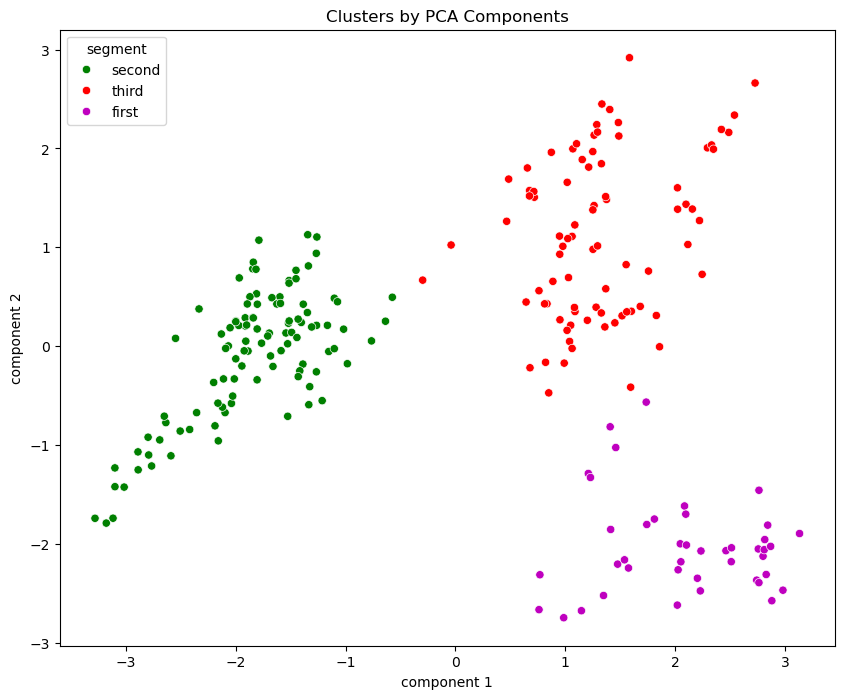

In [245]:
# Plot data by PCA components

x_axis = df1_pca_kmeans_time_shk['component 1']
y_axis = df1_pca_kmeans_time_shk['component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df1_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

#### Good cluster separation.

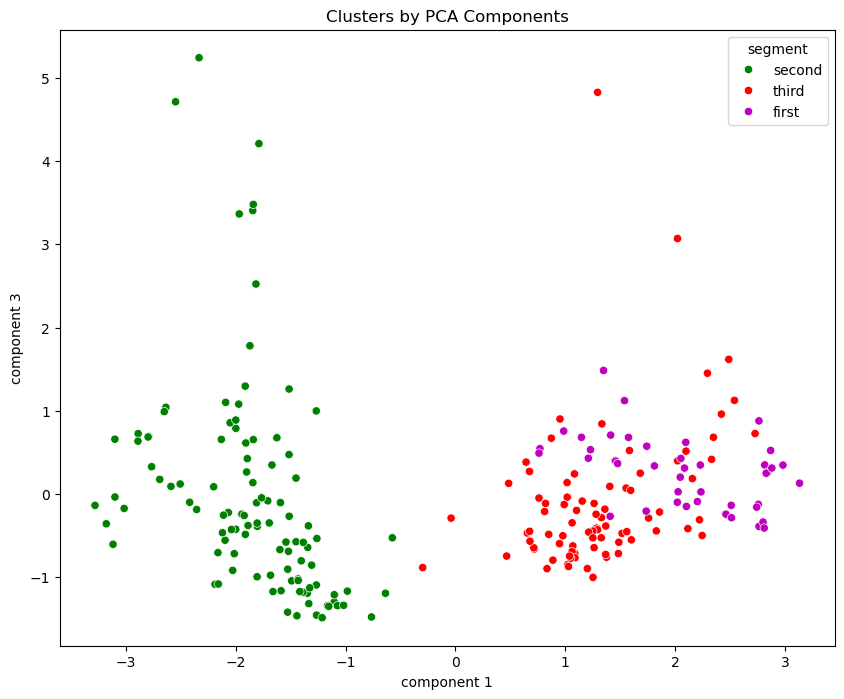

In [248]:
# Plot more data by PCA components

x_axis = df1_pca_kmeans_time_shk['component 1']
y_axis = df1_pca_kmeans_time_shk['component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df1_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

#### Some overlap of first & third clusters, but this is a 2D view. 3D will sometimes tell a different story.

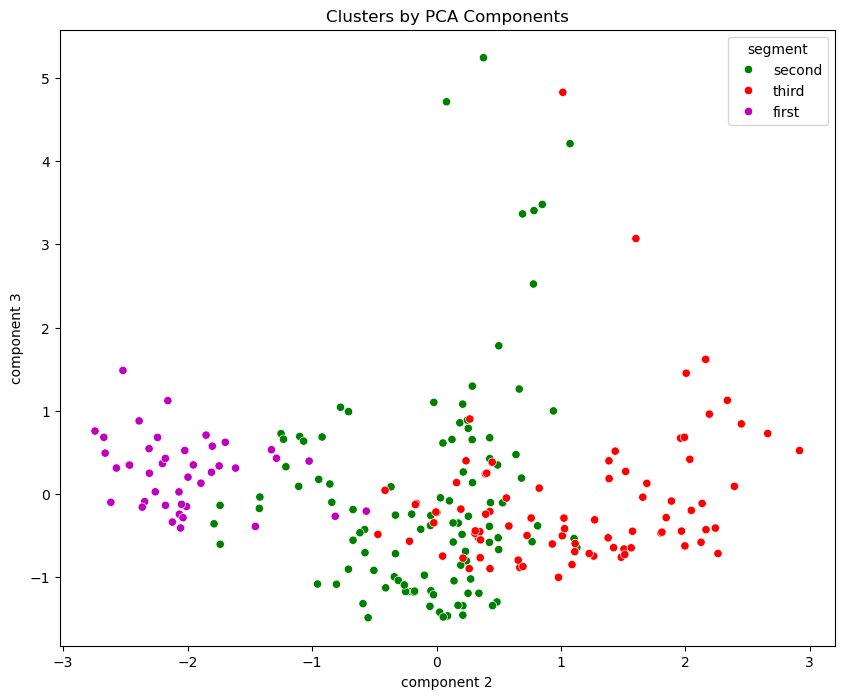

In [251]:
# Plot more data by PCA components

x_axis = df1_pca_kmeans_time_shk['component 2']
y_axis = df1_pca_kmeans_time_shk['component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df1_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

#### Least cluster separation on a 2D plane for PC2 vs PC3.

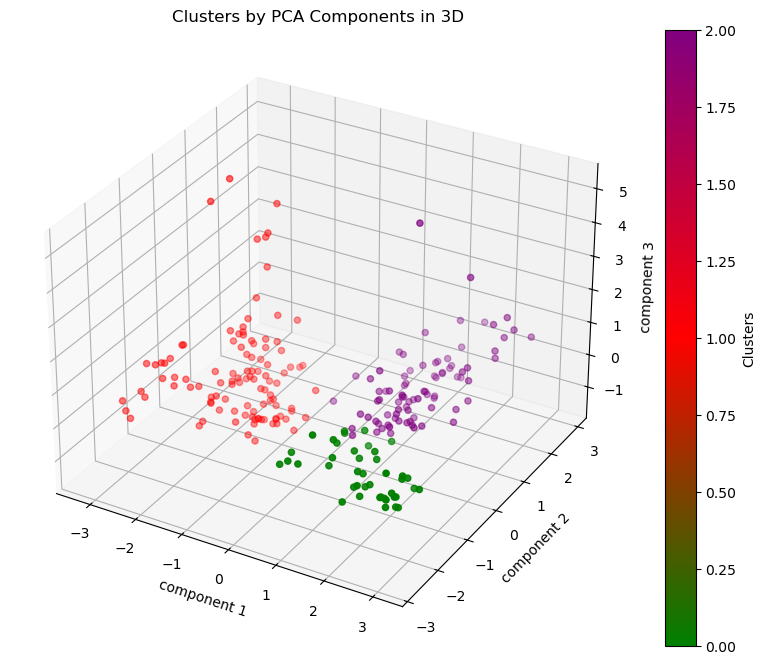

In [254]:
# Create a 3D scatterplot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

x_axis = df1_pca_kmeans_time_shk['component 1']
y_axis = df1_pca_kmeans_time_shk['component 2']
z_axis = df1_pca_kmeans_time_shk['component 3']
clusters = df1_pca_kmeans_time_shk['segment k-means pca']

# Create custom color map
custom_map = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['green', 'red', 'purple'])

# Create figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with custom colormap
scatter = ax.scatter(x_axis, y_axis, z_axis, c=clusters, cmap=custom_map)

plt.colorbar(scatter, label='Clusters')  # Creates a colorbar to explain the color mapping

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.title('Clusters by PCA Components in 3D')
plt.show()

#### The 3D "forest view" of three PCs shows separation of the three clusters.

### Timeline of clusters

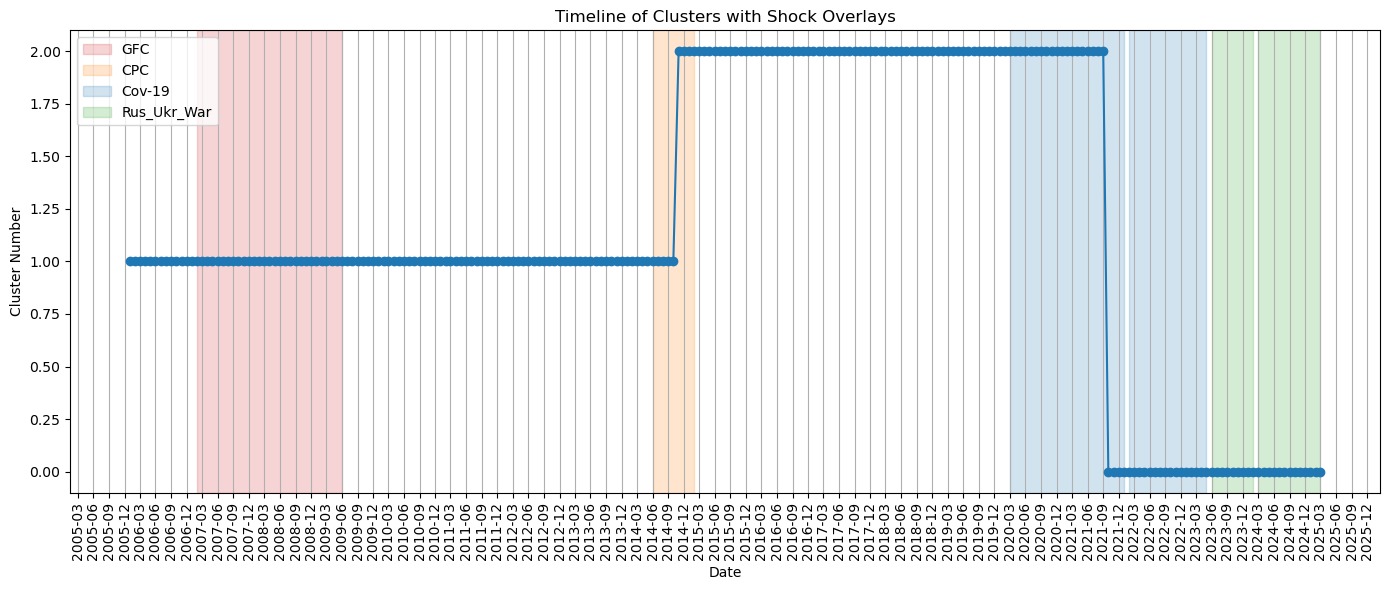

In [258]:
# Plot a timeline of clusters for visibility into macro regimes

import matplotlib.dates as mdates  # Import this function to use in adjusting the x-axis date regime

# Define a color map for each unique shock
shock_colors = {
    'GFC': '#D62728',                  # red
    'CPC': '#FF7F0E',                 # orange
    'Cov-19': '#1F77B4',             # blue
    'Rus_Ukr_War': '#2CA02C',        # green
    'BOJ Pivot': '#9467BD',          # purple
    'Cov-19 & Rus_Ukr_War': '#8C564B',      # brown
    'Rus_Ukr_War & BOJ Pivot': '#E377C2'    # pink
}

x_series = df1_pca_kmeans_time_shk['timestamp']
y_series = df1_pca_kmeans_time_shk['segment k-means pca']

plt.figure(figsize = (14, 6))

ax = plt.gca()  # Get the current axes

# Set the date format to Year-Month (e.g., 2020-03)
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Control the monthly tick spacing to show monthly ticks
# Adjust the interval as needed
# For example, to show ticks every 3 months: mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate the x-axis labels vertically for legibility
plt.xticks(rotation=90)

plt.plot(x_series, y_series, marker = 'o', linestyle = '-')

# Add color bands for each shock (skip 'No Shock')
for shock in df1_pca_kmeans_time_shk['shock_name'].unique():
    if shock != 'No Shock':
        mask = df1_pca_kmeans_time_shk['shock_name'] == shock
        start_date = df1_pca_kmeans_time_shk.loc[mask, 'timestamp'].min()
        end_date = df1_pca_kmeans_time_shk.loc[mask, 'timestamp'].max()

        # Handle hybrid shock labels by mapping to a single color
        for keyword in shock_colors:
            if keyword in shock:
                ax.axvspan(start_date, end_date,
                           color=shock_colors[keyword], alpha=0.2,
                           label=keyword if keyword not in ax.get_legend_handles_labels()[1] else "")
                break

plt.title('Timeline of Clusters with Shock Overlays')
plt.xlabel('Date')
plt.ylabel('Cluster Number')
ax.grid(axis='x', which='major') # This will show vertical gridlines from the x-axis ticks

# Show unique legend entries only
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.tight_layout() # Automatically adjusts subplot parameters for a tight layout
plt.show()

### This is a key finding visualization, which will be examined and integrated with other insights further below.

#### Calculate summary stats per cluster for original variables

In [262]:
summary = df1_pca_kmeans_time_shk.groupby('segment').agg({
    'int_rate_10y': ['mean', 'median', 'std'],
    'stock_index': ['mean', 'median', 'std'],
    'cons_prices': ['mean', 'median', 'std'],
    'fx_to_usd': ['mean', 'median', 'std'],
    'unemp_rate': ['mean', 'median', 'std'],
    'vix_avg': ['mean', 'median', 'std'],
    'brent_avg': ['mean', 'median', 'std']   
})

In [264]:
summary.shape

(3, 21)

In [266]:
summary

int_rate_10y                  stock_index                      \
                mean median       std        mean   median        std   
segment                                                                 
first       3.223095  3.380  0.638762  221.752381  214.810  20.208640   
second      3.492075  3.735  0.929214   71.730377   71.745  14.252631   
third       1.452048  1.490  0.362322  130.678313  135.050  26.254760   

        cons_prices                    fx_to_usd  ...           unemp_rate  \
               mean  median       std       mean  ...       std       mean   
segment                                           ...                        
first    128.430952  129.85  5.771270  10.249286  ...  0.769042   3.619048   
second    90.967925   92.05  4.483441   5.963679  ...  0.427271   3.476415   
third    107.479518  107.70  5.057372   8.482289  ...  0.582058   4.448193   

                            vix_avg                    brent_avg          \
        median       std       mean  median       std       mean  median   
segment                                                                    
first      3.6  0.397086  19.259286  18.185  4.923842  85.698095  83.295   
second     3.6  0.491558  20.928962  17.670  9.963168  90.224906  93.725   
third      4.4  0.566194  17.678795  15.840  7.223814  57.087711  57.540   

                    
               std  
segment             
first    11.302154  
second   23.052041  
third    12.367395  

[3 rows x 21 columns]

### The summary stats (table above) for the original raw data variables in my opinion are difficult to interpret (e.g. less useful) because: (1) they are on different scales and even determining the "CV" (Coefficient of Variation, e.g. mean divided by standard deviation) for each, for comparison purposes, does not overcome the different-scales problem; and (2) typical of financial time series data, and the case here, is the long-term trending behavior of stock indices and inflation, for example, with the mean and standard deviation drifting higher over time, handicapping objective cross-temporal comparisons for the metrics and segments in the table.

## Consequently, the next three (3) visualizations (see line plots further below), together with the "Timeline of Clusters with Shock Overlays" line plot (above) and the PC loadings matrix (further above), with luck can provide a more definitive analysis to enable a sensible interpretation of clustered macroeconomic regime profiles impacting Norway through different shock and normal ("no shock") periods.

## Data wrangling

#### Create a subset dataframe to facilitate time series line plots of each standardized PC and its influential variable contributors

#### The line plots are intended to help with interpretation of PC regimes and response to exogenous shocks

##### Rescale raw data variables into a dataframe for manipulation, rather than the default array object type created by StandardScaler()
##### scaler.set_output(transform='pandas') will change the scaled output array object into a dataframe, once scaler.fit_transform() is run

In [274]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

StandardScaler()

In [276]:
df1_std_datafr = scaler.fit_transform(df1)

In [278]:
df1_std_datafr.head(3)

,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg
0,0.791868,-1.045781,-1.433514,-0.578988,0.517239,-0.886033,-0.602277
1,0.850848,-0.997433,-1.385758,-0.510727,0.517239,-0.834669,-0.708420
2,0.951956,-0.944628,-1.372113,-0.578988,0.071964,-0.927840,-0.626053


##### Wrangle the data from two dataframes into a subset dataframe that will be used for the line plots

In [281]:
df1_pca_kmeans_time_shk.columns

Index(['timestamp', 'shock_name', 'int_rate_10y', 'stock_index', 'cons_prices',
       'fx_to_usd', 'unemp_rate', 'vix_avg', 'brent_avg', 'component 1',
       'component 2', 'component 3', 'segment k-means pca', 'segment'],
      dtype='object')

In [283]:
df1_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,fx_to_usd,unemp_rate,vix_avg,brent_avg,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,3.65,59.19,82.7,6.63,4.2,12.04,63.31,-1.344871,1.127668,-0.640737,1,second
1,2006-02-01,No Shock,3.72,62.01,83.4,6.75,4.2,12.47,60.81,-1.261618,1.104838,-0.533393,1,second
2,2006-03-01,No Shock,3.84,65.09,83.6,6.63,3.9,11.69,62.75,-1.451715,0.767999,-0.572466,1,second


In [314]:
norway_pc_df1_std = df1_pca_kmeans_time_shk[['timestamp', 'shock_name', 'component 1', 'component 2', 'component 3', \
                                             'segment k-means pca', 'segment']]

In [316]:
norway_pc_df1_std.head(3)

,timestamp,shock_name,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,-1.344871,1.127668,-0.640737,1,second
1,2006-02-01,No Shock,-1.261618,1.104838,-0.533393,1,second
2,2006-03-01,No Shock,-1.451715,0.767999,-0.572466,1,second


##### The 3 PC variables need to be standardized to enable like-with-like scale comparisons with their standardized key component variables in the time series line plots further below.

In [319]:
columns_to_scale = ['component 1', 'component 2', 'component 3']

In [321]:
scaler = StandardScaler()

##### Note: it was necessary to use the .loc[] indexing (below) to avoid a SettingWithCopyWarning message regarding attempting to modify a dataframe that is potentially a "view' of another dataframe, rather than an independent "copy". 

In [327]:
norway_pc_df1_std.loc[:, (columns_to_scale)] = scaler.fit_transform(norway_pc_df1_std[columns_to_scale])

##### Column names for the standardized PCs need to be renamed for accurate labeling

In [330]:
norway_pc_df1_std = norway_pc_df1_std.rename(columns={'component 1': 'component_1_std', 'component 2': 'component_2_std', \
                                             'component 3': 'component_3_std'})

In [332]:
df1_std_datafr.columns

Index(['int_rate_10y', 'stock_index', 'cons_prices', 'fx_to_usd', 'unemp_rate',
       'vix_avg', 'brent_avg'],
      dtype='object')

In [334]:
norway_pc_df1_std.loc[:, ['int_rate_10y', 'stock_index', 'cons_prices', 'fx_to_usd', 'unemp_rate',
       'vix_avg', 'brent_avg']] = df1_std_datafr[['int_rate_10y', 'stock_index', 'cons_prices', 'fx_to_usd', 'unemp_rate',
       'vix_avg', 'brent_avg']]

##### Column names for the standardized original variables need to be renamed for accurate labeling

In [337]:
norway_pc_df1_std = norway_pc_df1_std.rename(columns={'int_rate_10y': 'int_rate_10y_std', 'stock_index': 'stock_index_std', \
                                             'cons_prices': 'cons_prices_std', 'fx_to_usd': 'fx_to_usd_std', 'unemp_rate': 'unemp_rate_std', \
                                             'vix_avg': 'vix_avg_std', 'brent_avg': 'brent_avg_std'})

In [339]:
norway_pc_df1_std.shape

(231, 14)

In [341]:
norway_pc_df1_std.head(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y_std,stock_index_std,cons_prices_std,fx_to_usd_std,unemp_rate_std,vix_avg_std,brent_avg_std
0,2006-01-01,No Shock,-0.738901,0.871072,-0.613644,1,second,0.791868,-1.045781,-1.433514,-0.578988,0.517239,-0.886033,-0.602277
1,2006-02-01,No Shock,-0.693160,0.853437,-0.510839,1,second,0.850848,-0.997433,-1.385758,-0.510727,0.517239,-0.834669,-0.708420
2,2006-03-01,No Shock,-0.797603,0.593244,-0.548260,1,second,0.951956,-0.944628,-1.372113,-0.578988,0.071964,-0.927840,-0.626053


In [343]:
norway_pc_df1_std.tail(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y_std,stock_index_std,cons_prices_std,fx_to_usd_std,unemp_rate_std,vix_avg_std,brent_avg_std
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,1.582787,-1.987236,0.299722,0,first,0.985658,2.358803,2.141381,2.105947,-0.224887,-0.322227,0.029490
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,1.638358,-1.904887,0.333384,0,first,0.985658,2.369947,2.271006,2.020621,-0.076461,-0.297142,-0.097882
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,1.518278,-1.846044,0.841874,0,first,1.103618,2.416580,2.209605,1.730511,-0.076461,0.284582,-0.244360


##### The subset dataframe "norway_pc_df1_std" created above will be used as the dataframe in the next line plots

In [346]:
norway_pc_df1_std.columns

Index(['timestamp', 'shock_name', 'component_1_std', 'component_2_std',
       'component_3_std', 'segment k-means pca', 'segment', 'int_rate_10y_std',
       'stock_index_std', 'cons_prices_std', 'fx_to_usd_std', 'unemp_rate_std',
       'vix_avg_std', 'brent_avg_std'],
      dtype='object')

## Define a custom function

#### Customize plotting function script used in other Tasks to add vertical cluster pivot lines

In [349]:
import matplotlib.dates as mdates

# Define color map for known shocks
shock_colors = {
    'GFC': '#D62728',
    'CPC': '#FF7F0E',
    'Cov-19': '#1F77B4',
    'Rus_Ukr_War': '#2CA02C',
    'BOJ Pivot': '#9467BD',
    'Cov-19 & Rus_Ukr_War': '#8C564B',
    'Rus_Ukr_War & BOJ Pivot': '#E377C2'
}

# Optional: Define known cluster pivot points (YYYY-MM format strings)
cluster_pivots = {
    '2014-10': 'Cluster 1→2 Pivot',
    '2021-09': 'Cluster 2→0 Pivot'
}

def plot_pc_with_components_and_shocks(x, pc_series, comp_dict, df, pc_label='PC1', title=None,
                                       show_cluster_pivots=True, cluster_pivots=cluster_pivots):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=90)

    # Plot the PC and components
    plt.plot(x, pc_series, label=pc_label, marker='o')
    for comp_name, comp_series in comp_dict.items():
        plt.plot(x, comp_series, label=comp_name, marker='o')

    # Shock overlays as colored bands
    for shock in df['shock_name'].unique():
        if shock != 'No Shock':
            mask = df['shock_name'] == shock
            start_date = df.loc[mask, 'timestamp'].min()
            end_date = df.loc[mask, 'timestamp'].max()
            for keyword in shock_colors:
                if keyword in shock:
                    ax.axvspan(start_date, end_date, color=shock_colors[keyword], alpha=0.2,
                               label=keyword if keyword not in ax.get_legend_handles_labels()[1] else "")
                    break

    # Cluster pivot lines and annotations
    if show_cluster_pivots:
        for date_str, label in cluster_pivots.items():
            date = pd.to_datetime(date_str)
            ax.axvline(date, color='black', linestyle='--', linewidth=1.3)
            plt.text(date, ax.get_ylim()[1]*0.92, label, rotation=90, fontsize=9,
                     color='black', va='top', ha='center',
                     bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    # Title, labels, legend
    plt.title(title or f'Norway: Standardized {pc_label} and High-Loading Components with Shocks')
    plt.xlabel('Date')
    plt.ylabel('Standardized Value')
    ax.grid(axis='x', which='major')

    # Deduplicate legend entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper left')

    plt.tight_layout()
    plt.show()

#### Call the custom function to output the first line plot

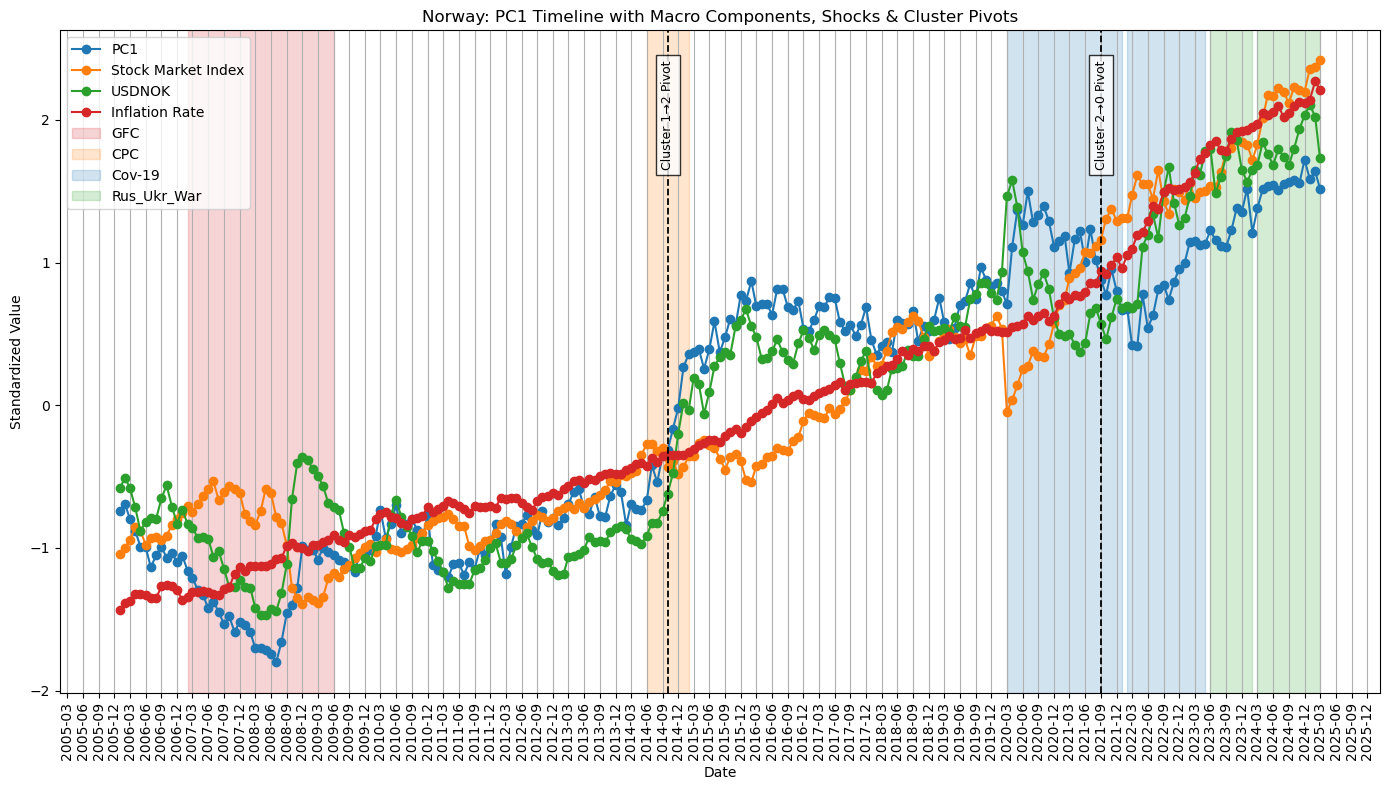

In [352]:
plot_pc_with_components_and_shocks(
    x=norway_pc_df1_std['timestamp'],
    pc_series=norway_pc_df1_std['component_1_std'],
    comp_dict={
        'Stock Market Index': norway_pc_df1_std['stock_index_std'],
        'USDNOK': norway_pc_df1_std['fx_to_usd_std'],
        'Inflation Rate': norway_pc_df1_std['cons_prices_std']
    },
    df=norway_pc_df1_std,
    pc_label='PC1',
    title='Norway: PC1 Timeline with Macro Components, Shocks & Cluster Pivots'
)

#### Call the custom function to output the second line plot

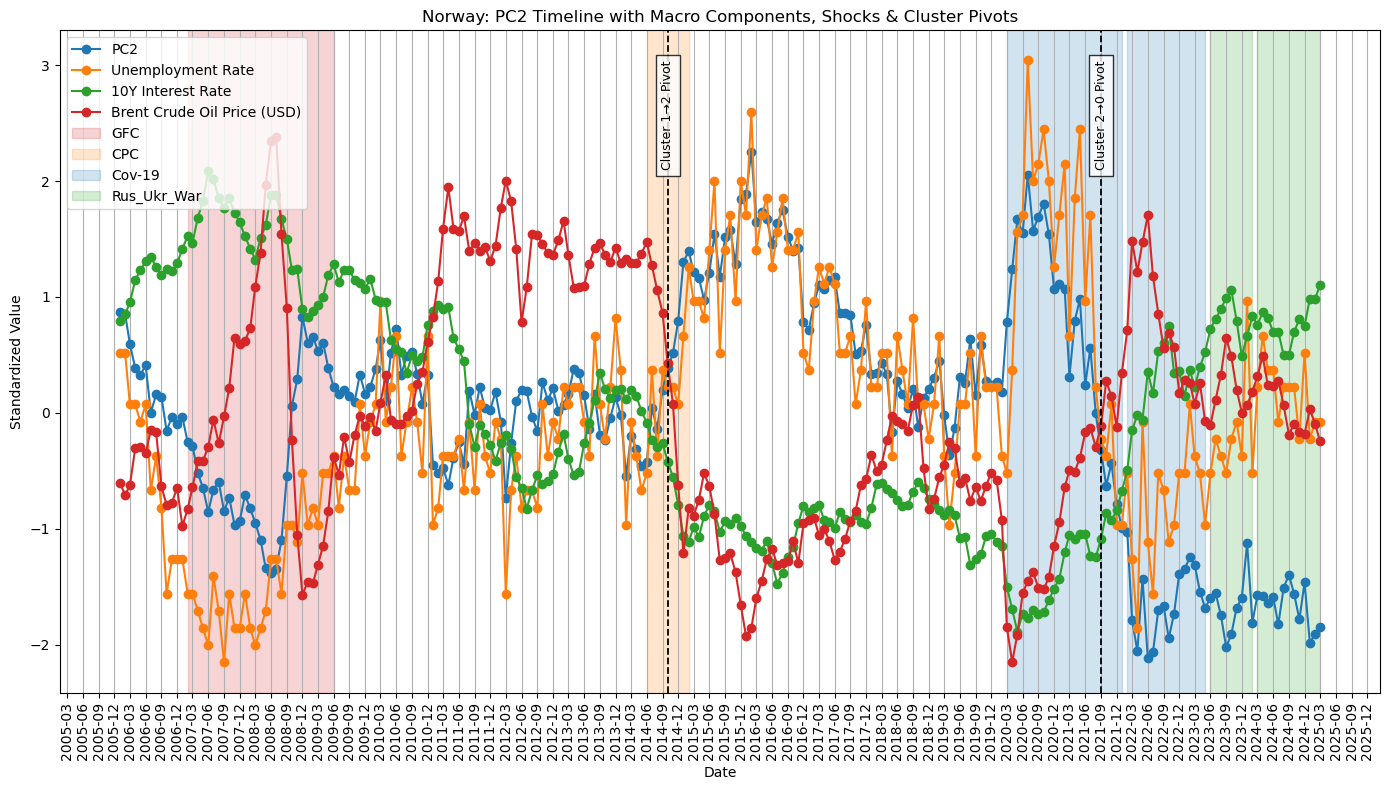

In [355]:
plot_pc_with_components_and_shocks(
    x=norway_pc_df1_std['timestamp'],
    pc_series=norway_pc_df1_std['component_2_std'],
    comp_dict={
        'Unemployment Rate': norway_pc_df1_std['unemp_rate_std'],
        '10Y Interest Rate': norway_pc_df1_std['int_rate_10y_std'],
        'Brent Crude Oil Price (USD)': norway_pc_df1_std['brent_avg_std']
    },
    df=norway_pc_df1_std,
    pc_label='PC2',
    title='Norway: PC2 Timeline with Macro Components, Shocks & Cluster Pivots'
)

#### Call the custom function to output the third line plot

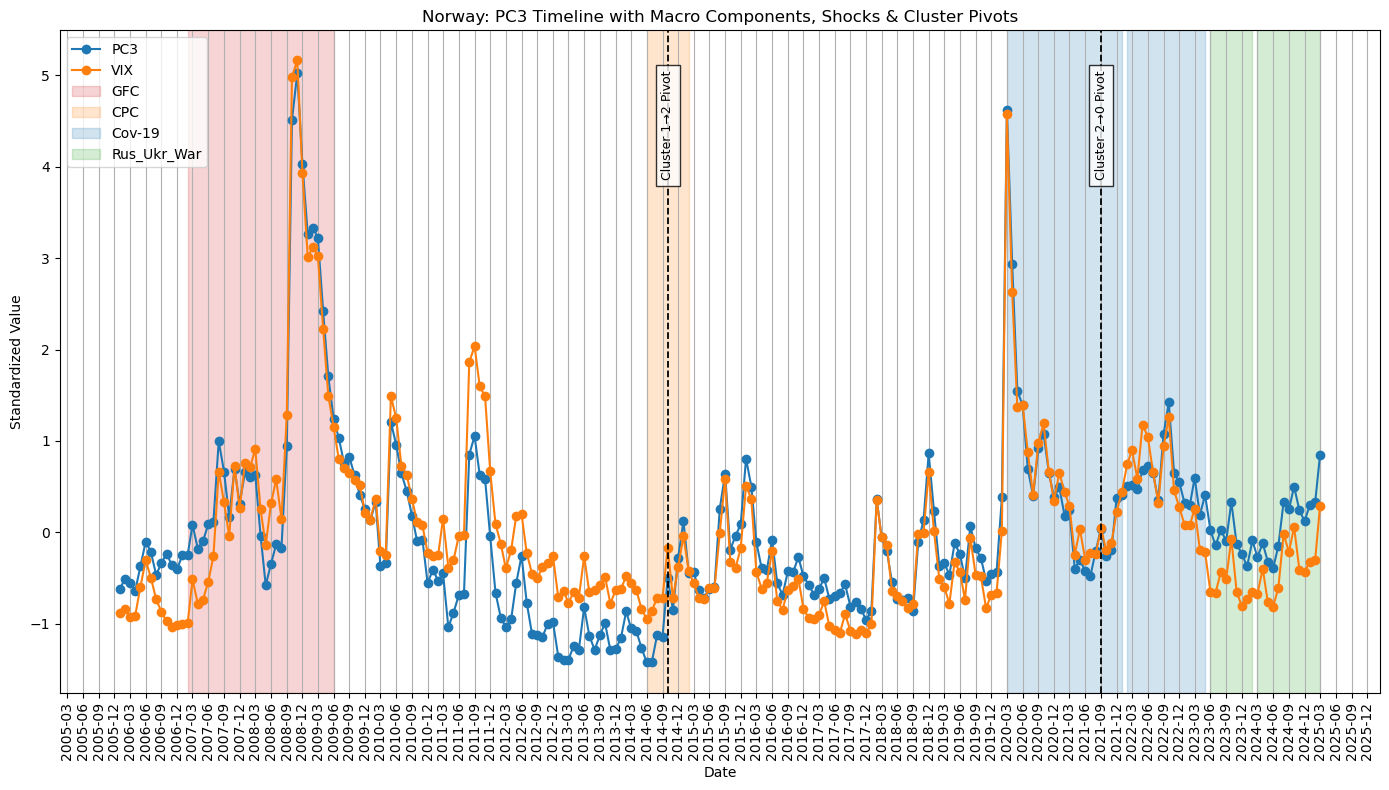

In [358]:
plot_pc_with_components_and_shocks(
    x=norway_pc_df1_std['timestamp'],
    pc_series=norway_pc_df1_std['component_3_std'],
    comp_dict={
        'VIX': norway_pc_df1_std['vix_avg_std'],
    },
    df=norway_pc_df1_std,
    pc_label='PC3',
    title='Norway: PC3 Timeline with Macro Components, Shocks & Cluster Pivots'
)

## Findings from PCA + k-means clustering + visualizations

#### (1) PCA worked best on the standardized original raw data variables, rather than the standardized annual log returns version of the data. It yielded 3 PCs (principal components) that cumulatively explain 87% of the 7-variable dataset.  PC1 represents an "Inflation - Currency - Equities" axis.  PC2 is a "Labor - Cost of Money - Commodities" axis.  PC3 is overwhelmingly the "Risk Sentiment" axis.

#### (2) k-means clustering yielded three (3) defined clusters that separated well on a 3D scatterplot of the 3 PCs (principal components) color-coded by cluster. Also on a 2D lower-dimension scatterplot of PC1 vs PC2, which together explain the lion's share of variance in the 7-variable dataset. One takeaway from the scatterplot work is that the dimensional "lens" or microscope applied (3D vs 2D) to visually analyze data clusters can change the interpretation (overlap or separation) quite a bit, at times. Visualizing in different dimensions, where possible, promotes a better, more nuanced understanding of the data. The k-means algorithm numbered the clusters as 0, 1 and 2, labeled here as "first", "second" and "third", respectively.

#### (3) The next visual, "Timeline of Clusters with Shock Overlays", surfaced a key finding, namely, that both cluster pivots (changes, baton handoffs) took place during one moderate, and one major exogenous shock period. Cluster 1 (named as "second") ran from Jan 2006 to Oct 2014, roughly halfway through the CPC "moderate" shock period (2014 Commodities Price Collapse), when Cluster 2 (named as "third") takes over, running from Nov 2014 to Sep 2021. That temporal end point was approximately halfway through the Covid-19 "major" shock period, and 5 months before the start of the Russia-Ukraine War "moderate" shock period.  The last cluster, Cluster 0 (named as "first") then takes over, running from Oct 2021 forward in time to the end of the project study period (Mar 2025).

#### (4) The two cluster pivots were symptomatic of economic regime behavioral changes.  The fact that both switches happened during exogenous shock periods suggests shock-induced causality. As expected.  However, what is most puzzling was the **_absence_** of a cluster switch during the GFC (Global Financial Crisis), a major shock period that lasted ~29 months and spread from the overleveraged, underregulated US economy to the global economy. By contrast, the CPC was moderate and lasted only ~9 months.

#### (5) This puzzling question motivated the addition of a United States PCA + k-means clustering section further below, strictly for comparative purposes and seeking an answer.  We want to see whether the Norwegian economy wore a Teflon jacket against the GFC but the US did not, which then gets us into "Why was Norway spared?"

#### (6) After the "Timeline of Clusters with Shock Overlays" visualization, the three (3) time series line plots of PCs and their key components movements relative to each other, exogenous shock periods and the two (2) cluster pivot points, attempt to crystallize interpretation of all the moving parts.

#### (7) PC1 timeline plot screams "Trend", PC2 "Mean Reversion" and PC3 "Risk Sentiment" (alternatively, "Volatility").

#### (8) The PC1 key component, inflation, appears to be the most stable trender (upward), followed by the Norwegian stock market and finally, USDNOK (Norwegian Krone amount per 1 USD), visually. Going back to the "loadings" discussed earlier, PC1 is a derived variable -- a weighted representation of its 7 components, with the three just-named variables (inflation, stock market, currency) acting as the key drivers (of PC1). It's clear that the 5 exogenous shocks and two economic regime changes (cluster pivot temporal points) did little to stop or reverse the secular upward march of PC1's key components.  At worst these forces caused some short-term mean reversion behavior (e.g. pendulum swings) for the components (variables), before resuming their march higher.

#### (9) By sharp contrast, PC2 and its key components, the unemployment rate, 10-year interest rate and Brent crude oil (USD) price, are excellent examples of mean reversion pendulum-type swings around a mean or central line for each, at least when viewed from afar (temporally, > 19 years). Holding a temporal telescope, lens or microscope to the data can change the trend vs mean reversion behavioral determination, perspective matters as we learned in the 3D vs 2D scatterplots analysis.  Visually the PC2 key components look stationary, but quantitative stationarity verification methods are needed to confirm that. The exogenous shocks appear to increase the amplitude of the pendulum swings of variables, while the two economic regime changes (cluster pivot temporal points) do not appear to alter the direction the variables are moving.

#### (10) PC3, with an 88% loading for its VIX key component, as expected tracks (correlates with) the VIX pretty closely over time.  The line plot shows mean reversion behavior but with two giant, major shock-provoked spikes during the GFC and Covid-19.  The 2nd cluster pivot, around the middle of the Covid-19 period, coincides with a PC3 (and VIX) reversal upward (directional change).

#### (11) Mean reversion is caused by counter forces or adjustments reacting to the initial forces.  Thus governments, central banks and markets adjust to combat volatility (by calming volatility through stabilization measures, liquidity injections, etc.), mitigate unemployment (a bad thing), reduce cost of money (10-year interest rate) and "manage" runaway commodities inflation (i.e. price of oil) downward (usually by increasing supply rather than suppressing demand). The pendulum swings tell a predictable, ongoing story about certain variables -- but not about the trending PC1 brigade, namely inflation, stock market and for some reason, USDNOK. Some currency pairs submit to mean reversion, others are trenders, although the temporal vantage point of observation again matters to characterization.

#### (12) Cluster interpretation may be more art than science at times.  Cluster 1 ("second"), which ran Jan 2006 - Oct 2014, straddled the GFC and did not pivot within that major crisis. It's telling us that Norway's economy was impacted less during that time than the US was. Contagion can be contained, if Brent crude oil is one of your major exports and you happen to have long-term forward and futures agreements hedging the wild gyrations of global oil prices.  Moreover, the USD price of Brent crude oil spent most of the GFC above its price level at the start of that shock period, thus it's difficult to envision Norway suffering a collapse in pricing at least (demand however, is a separate question). Natural gas, a larger export category for Norway based on revenues earned, is excluded from this analysis due to low correlations with many other variables -- unlike crude oil, which gets the limelight. Norway's Cluster 1 might be labeled "normal expansion / pre-oil bust / stable macro regime" for its bailiwick (European hemisphere) and markets. Its sovereign wealth fund, the world's largest and best-run, may have also been a stabilizing influence during the GFC years, in Norway and beyond.

#### (13) Cluster 2 ("third"), more-or-less bisecting the CPC (2014 Commodities Price Collapse) when it took over from the temporally-prior Cluster 1, can be described as a "macro stress / currency + commodities shock regime" for Norway specifically. Interpretation of this cluster is straightforward, and it continued through the first half of the Covid-19 shock period, because among other things the price of Brent crude oil remained well below its pre-CPC level. The few positives for the Cluster 2 period include the Norwegian stock market climb and mean reversion (back down, after peaking) of the unemployment rate.

#### (14) Cluster 0 ("first"), which took over from Cluster 2 halfway through the Covid-19 shock period, can be described objectively as a "reflationary boom / strong macro / low volatility regime", despite persisting through the Russia-Ukraine War and BOJ Interest Rate Pivot moderate shock periods. Brent crude oil (USD) pricing recovered partially lost ground during the prior cluster's period, the stock market climbed sharply, unemployment and volatility (as measured by the VIX) stabilized.

### 07. Extension: Norway SRS component data derivation

#### Comment:

#### The Shock Resilience Score (“SRS”) is an economic resilience metric co-developed with ChatGPT. It measures how robust a country’s economy is during major or moderate exogenous shocks.

#### Based on project observations, the Global Financial Crisis (GFC) and Covid-19 caused major system-wide disruptions. The Commodity Price Collapse (CPC) had moderate impact, while the Russia–Ukraine War and the BoJ Interest Rate Pivot produced only localized effects (e.g., natural gas to Europe or partial unwind of the global carry trade).

#### Accordingly, the SRS will focus on the GFC, Covid-19, and CPC when evaluating the seven OECD countries profiled: Norway, the United States, Germany, Japan, South Korea, Switzerland, and Australia.

#### SRS derivation enables a comparative ranking of economic resilience — and may yield some surprising results.

In [367]:
# Check some of the data content that will be used in SRS component calculations
norway_pc_df1_std.columns

Index(['timestamp', 'shock_name', 'component_1_std', 'component_2_std',
       'component_3_std', 'segment k-means pca', 'segment', 'int_rate_10y_std',
       'stock_index_std', 'cons_prices_std', 'fx_to_usd_std', 'unemp_rate_std',
       'vix_avg_std', 'brent_avg_std'],
      dtype='object')

##### Export dataframe for Excel-based SRS component calculations 

In [386]:
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
norway_pc_df1_std.to_excel(os.path.join(path, 'Data', 'Prepared Data', 'norway_srs_raw.xlsx'))